In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
df_train=pd.read_csv('fraudTrain.csv',header=0)
df_test=pd.read_csv('fraudTest.csv',header=0)

In [16]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [17]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [18]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
23362,23362,2019-01-14 17:53:07,6538441737335434,fraud_Deckow-Dare,food_dining,2.88,Gina,Grimes,F,444 Robert Mews,...,41.3851,-80.1752,606,Energy manager,1997-09-22,503a2dda2c3ac335b090a77d9a2ed6ba,1326563587,42.093058,-79.510755,0.0
23363,23363,2019-01-14 17:53:29,2254917871818484,fraud_Schroeder Group,health_fitness,19.09,Margaret,Gibson,F,382 Williams Stream Suite 197,...,38.0828,-76.3477,313,Insurance underwriter,1976-03-26,c7d41b37a8c9041bc90f4d5980ccb6ab,1326563609,37.542701,-75.893037,0.0
23364,23364,2019-01-14 17:54:13,213161231269724,fraud_Roob-Okuneva,health_fitness,114.06,Alyssa,Morgan,F,622 Robin Run Suite 764,...,34.0480,-85.9246,67082,Physiological scientist,1963-02-09,e9008a161a61453e1fd2c716425b1b04,1326563653,34.581678,-86.014739,0.0
23365,23365,2019-01-14 17:54:34,213141712584544,fraud_Hermann and Sons,shopping_pos,16.33,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,65f7dfc9b12bd1be79d0867f1bdc972f,1326563674,32.774707,-91.096222,0.0
23366,23366,2019-01-14 17:54:56,4079773899158,fraud_Boyer-Haley,travel,2.12,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,8bb192be9087b60da4160b94d4464cf9,1326563696,43.991928,-115.730887,NaN


In [19]:
df_train.shape

(23367, 23)

In [20]:
df_test.shape

(27235, 23)

In [21]:
df_train.size

537441

In [22]:
df_test.size

626405

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23367 entries, 0 to 23366
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23367 non-null  int64  
 1   trans_date_trans_time  23367 non-null  object 
 2   cc_num                 23367 non-null  int64  
 3   merchant               23367 non-null  object 
 4   category               23367 non-null  object 
 5   amt                    23367 non-null  float64
 6   first                  23367 non-null  object 
 7   last                   23367 non-null  object 
 8   gender                 23367 non-null  object 
 9   street                 23367 non-null  object 
 10  city                   23367 non-null  object 
 11  state                  23367 non-null  object 
 12  zip                    23367 non-null  int64  
 13  lat                    23367 non-null  float64
 14  long                   23367 non-null  float64
 15  ci

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27235 entries, 0 to 27234
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27235 non-null  int64  
 1   trans_date_trans_time  27235 non-null  object 
 2   cc_num                 27235 non-null  int64  
 3   merchant               27235 non-null  object 
 4   category               27235 non-null  object 
 5   amt                    27235 non-null  float64
 6   first                  27235 non-null  object 
 7   last                   27235 non-null  object 
 8   gender                 27235 non-null  object 
 9   street                 27235 non-null  object 
 10  city                   27235 non-null  object 
 11  state                  27235 non-null  object 
 12  zip                    27235 non-null  int64  
 13  lat                    27234 non-null  float64
 14  long                   27234 non-null  float64
 15  ci

In [25]:
df_train.describe

<bound method NDFrame.describe of        Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2019-01-01 00:00:18  2703186189652095   
1               1   2019-01-01 00:00:44      630423337322   
2               2   2019-01-01 00:00:51    38859492057661   
3               3   2019-01-01 00:01:16  3534093764340240   
4               4   2019-01-01 00:03:06   375534208663984   
...           ...                   ...               ...   
23362       23362   2019-01-14 17:53:07  6538441737335434   
23363       23363   2019-01-14 17:53:29  2254917871818484   
23364       23364   2019-01-14 17:54:13   213161231269724   
23365       23365   2019-01-14 17:54:34   213141712584544   
23366       23366   2019-01-14 17:54:56     4079773899158   

                                 merchant        category     amt      first  \
0              fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1         fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                    fraud_Lind-Buckridge   entertainment  220.11     Edward   
3      fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                     fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                   ...             ...     ...        ...   
23362                   fraud_Deckow-Dare     food_dining    2.88       Gina   
23363               fraud_Schroeder Group  health_fitness   19.09   Margaret   
23364                  fraud_Roob-Okuneva  health_fitness  114.06     Alyssa   
23365              fraud_Hermann and Sons    shopping_pos   16.33   Margaret   
23366                   fraud_Boyer-Haley          travel    2.12       Eric   

          last gender                         street  ...      lat      long  \
0        Banks      F                 561 Perry Cove  ...  36.0788  -81.1781   
1         Gill      F   43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2      Sanchez      M       594 White Dale Suite 530  ...  42.1808 -112.2620   
3        White      M    9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4       Garcia      M               408 Bradley Rest  ...  38.4207  -79.4629   
...        ...    ...                            ...  ...      ...       ...   
23362   Grimes      F                444 Robert Mews  ...  41.3851  -80.1752   
23363   Gibson      F  382 Williams Stream Suite 197  ...  38.0828  -76.3477   
23364   Morgan      F        622 Robin Run Suite 764  ...  34.0480  -85.9246   
23365   Curtis      F               742 Oneill Shore  ...  32.1530  -90.1217   
23366  Preston      M     7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   

       city_pop                                job         dob  \
0          3495          Psychologist, counselling  1988-03-09   
1           149  Special educational needs teacher  1978-06-21   
2          4154        Nature conservation officer  1962-01-19   
3          1939                    Patent attorney  1967-01-12   
4            99     Dance movement psychotherapist  1986-03-28   
...         ...                                ...         ...   
23362       606                     Energy manager  1997-09-22   
23363       313              Insurance underwriter  1976-03-26   
23364     67082            Physiological scientist  1963-02-09   
23365     19685                        Fine artist  1984-12-24   
23366       129                       Cartographer  1965-12-15   

                              trans_num   unix_time  merch_lat  merch_long  \
0      0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1      1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2      a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3      6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4      a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                 ...         ..

In [26]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27235.000000,2.723500e+04,27235.000000,27235.000000,27234.000000,27234.000000,2.723400e+04,2.723400e+04,27234.000000,27234.000000,27234.000000
mean,13617.000000,4.118996e+17,69.594138,48432.186782,38.550531,-90.008376,9.031500e+04,1.372195e+09,38.546098,-90.011074,0.004259
std,7862.211627,1.301391e+18,136.072715,26773.965282,5.055259,13.552173,3.060605e+05,2.417363e+05,5.092408,13.562147,0.065126
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.584303,0.000000
25%,6808.500000,1.800468e+14,9.570000,25526.000000,34.690200,-96.701000,7.540000e+02,1.371966e+09,34.776847,-96.731896,0.000000
50%,13617.000000,3.519233e+15,46.770000,48034.000000,39.390000,-87.349000,2.457000e+03,1.372195e+09,39.388537,-87.304704,0.000000
75%,20425.500000,4.634956e+15,82.945000,71960.000000,42.015800,-80.124800,2.032800e+04,1.372431e+09,41.982873,-80.153222,0.000000
max,27234.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372581e+09,66.669356,-66.955602,1.000000


In [29]:
df_train.count()

,0
Unnamed: 0,23367
trans_date_trans_time,23367
cc_num,23367
merchant,23367
category,23367
amt,23367
first,23367
last,23367
gender,23367
street,23367


In [30]:
df_test.count()

,0
Unnamed: 0,27235
trans_date_trans_time,27235
cc_num,27235
merchant,27235
category,27235
amt,27235
first,27235
last,27235
gender,27235
street,27235


In [31]:
df_combined=pd.concat([df_train,df_test],axis=0)

In [32]:
df_combined.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [35]:
df_combined.shape

(50602, 23)

In [33]:
df_combined.size

1163846

In [34]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50602 entries, 0 to 27234
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50602 non-null  int64  
 1   trans_date_trans_time  50602 non-null  object 
 2   cc_num                 50602 non-null  int64  
 3   merchant               50602 non-null  object 
 4   category               50602 non-null  object 
 5   amt                    50602 non-null  float64
 6   first                  50602 non-null  object 
 7   last                   50602 non-null  object 
 8   gender                 50602 non-null  object 
 9   street                 50602 non-null  object 
 10  city                   50602 non-null  object 
 11  state                  50602 non-null  object 
 12  zip                    50602 non-null  int64  
 13  lat                    50601 non-null  float64
 14  long                   50601 non-null  float64
 15  city_po

In [36]:
df_combined.drop(labels=["first","last","job","dob","trans_num","street","trans_date_trans_time","city","state"],axis=1,inplace=True)

In [37]:
df_combined.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0


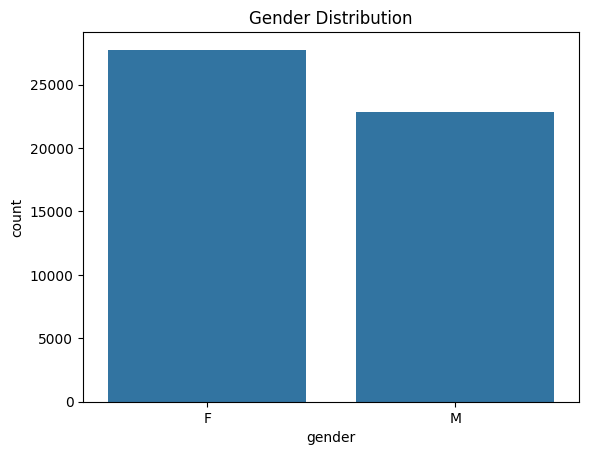

In [38]:
sns.countplot(x='gender',data=df_combined)
plt.title("Gender Distribution")
plt.show()

In [43]:
df_combined.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0


In [44]:
X=df_combined.drop("is_fraud",axis=1)
Y=df_combined["is_fraud"]

In [58]:
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [46]:
l1_model=LogisticRegression()

In [50]:
df_model=DecisionTreeClassifier()